<a href="https://colab.research.google.com/github/sreehariar04/test_new/blob/main/SREEHARI_CS_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Customer churn is a critical challenge for subscription-based businesses. Accurately predicting churn enables organizations to reduce revenue loss and improve customer satisfaction.

#Objective
The objective of this project is to build a machine learning model to predict customer churn using historical customer data. Customer churn prediction helps businesses proactively identify customers at risk of leaving and take retention actions.

# LIbraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV #model fine tuning

#EDA

## **Dataset Overview**
>Examined dataset dimensions, data types, and summary statistics

> target variable (Churn) distribution

## **Data Preparation**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/DSA_Sreehari/pre-processing/Training_data.csv')

In [4]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [5]:
train_data.shape

(5634, 21)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [7]:
# drop column 'customerID'
train_data.drop(columns='customerID',inplace=True)

In [8]:
train_data["TotalCharges"] = pd.to_numeric(train_data["TotalCharges"], errors="coerce")


##ANALYSIS

In [9]:
train_data['Churn'].value_counts()


,count
Churn,
No,4130
Yes,1504


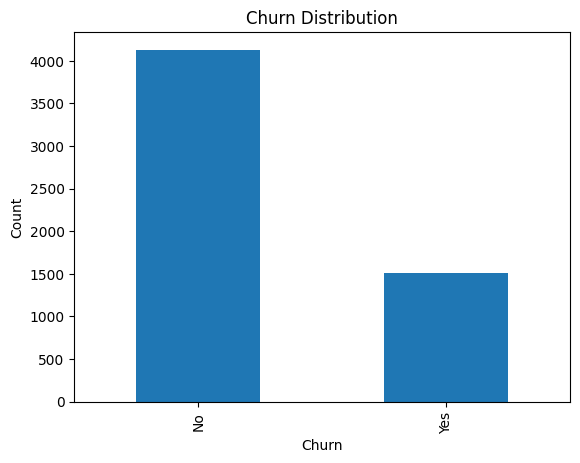

In [10]:
train_data['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


##Numerical Feature distribution

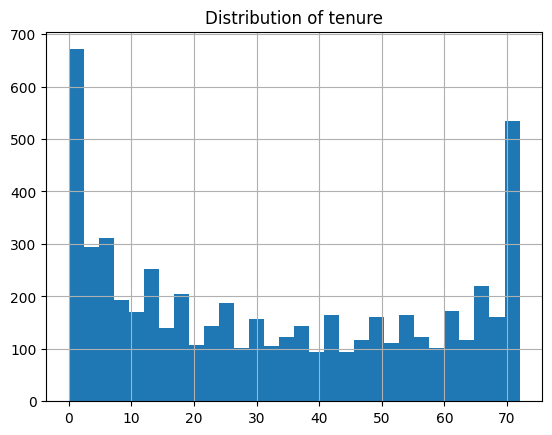

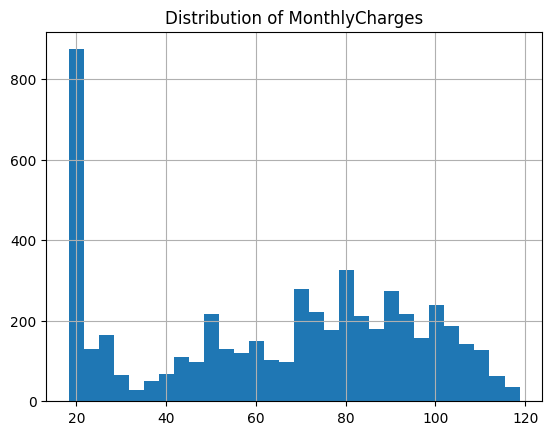

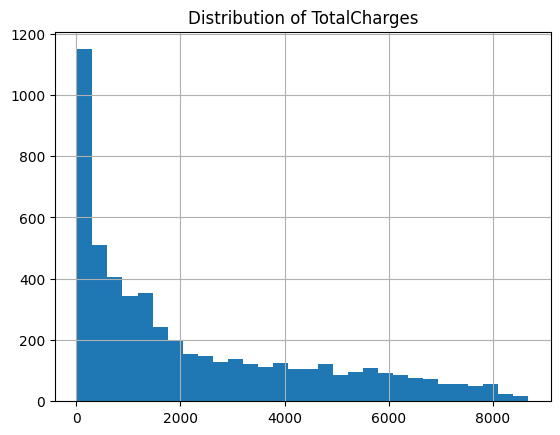

In [11]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    train_data[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


##Correlation Analysis

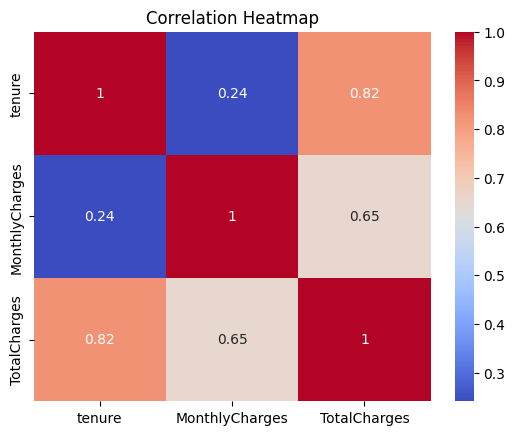

In [12]:
corr = train_data[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##**Key Insights**

>Churn is imbalanced

>Tenure and billing-related features strongly influence churn

>**Long**-term customers are less likely to churn

#Data PreProcessing

##Data Cleaning

## Check for Duplicates

In [13]:
# check for duplicated rows
train_data.duplicated().sum()

np.int64(8)

In [14]:
#check for duplicated rows.
train_data.T.duplicated().sum()

np.int64(0)

In [15]:
train_data = train_data.drop_duplicates()

In [16]:
train_data.duplicated().sum()

np.int64(0)

In [17]:
train_data.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


##  Check for Missing Values

In [18]:
train_data.isna().sum()

,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0


In [19]:
# seperate numerical and categorical columns

num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_data.select_dtypes(include=['object']).columns

num_cols,cat_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object'))

###Handle Missing Values


In [20]:
train_data['gender']=train_data['gender'].fillna(train_data['gender'].mode()[0])
train_data['OnlineSecurity']=train_data['OnlineSecurity'].fillna(train_data['OnlineSecurity'].mode()[0])


In [21]:
train_data['MonthlyCharges']=train_data['MonthlyCharges'].fillna(train_data['MonthlyCharges'].median())
train_data['TotalCharges']=train_data['TotalCharges'].fillna(train_data['TotalCharges'].median())

In [22]:
train_data.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


##Outlier Detection

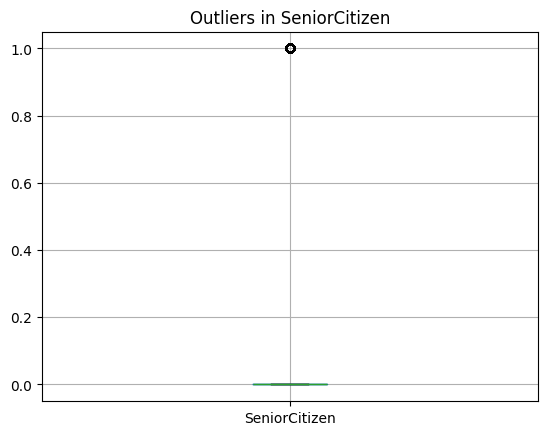

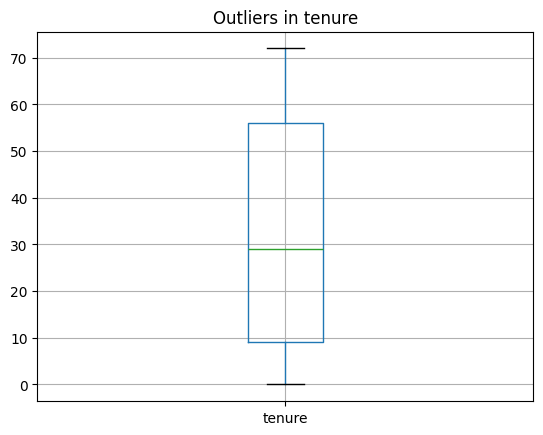

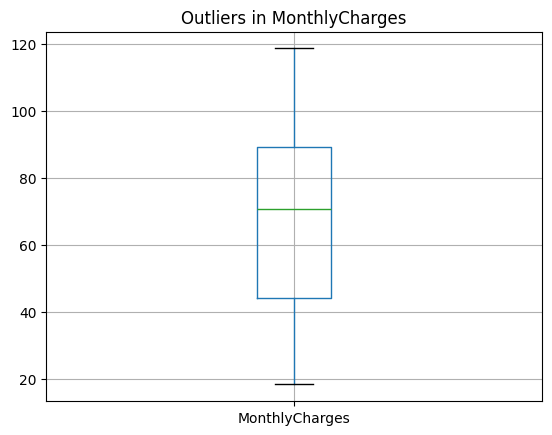

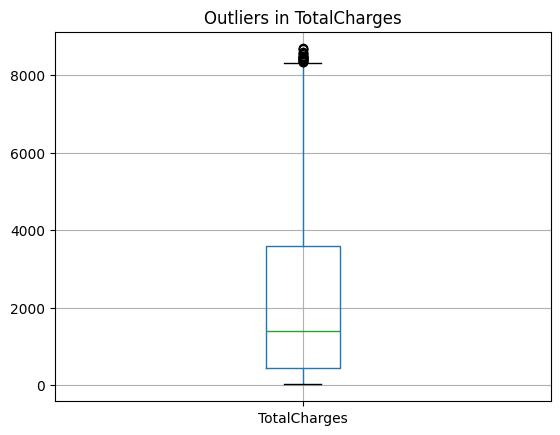

In [23]:
for col in num_cols:
    plt.figure()
    train_data.boxplot(column=col)
    plt.title(f'Outliers in {col}')
    plt.show()


In [24]:
Q1 = train_data['TotalCharges'].quantile(0.25)
Q3 = train_data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data['TotalCharges'] = np.where(
    train_data['TotalCharges'] < lower_bound,
    lower_bound,
    train_data['TotalCharges']
)

train_data['TotalCharges'] = np.where(
    train_data['TotalCharges'] > upper_bound,
    upper_bound,
    train_data['TotalCharges']
)


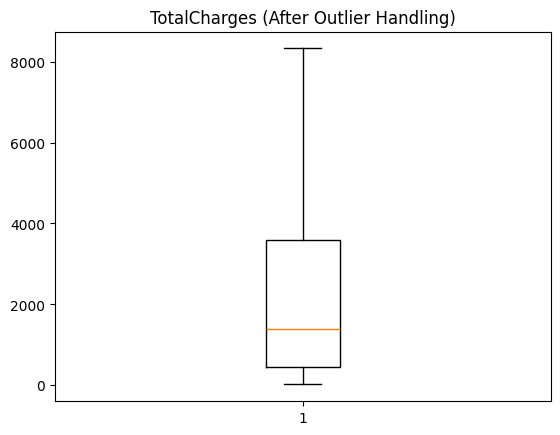

In [25]:
plt.figure()
plt.boxplot(train_data['TotalCharges'])
plt.title('TotalCharges (After Outlier Handling)')
plt.show()


In [26]:
train_data.shape

(5626, 20)

#Feature Engineering

In [27]:
#Customer Lifetime value
train_data['Customer_Lifetime_Value'] = train_data['tenure'] * train_data['MonthlyCharges']


In [28]:
#Average Charges per Month
train_data['Avg_Charges_Per_Month'] = train_data['TotalCharges'] / (train_data['tenure'] + 1)


In [29]:
contract_map = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}

train_data['Contract_Duration'] = train_data['Contract'].map(contract_map)
train_data['Tenure_Contract_Interaction'] = train_data['tenure'] * train_data['Contract_Duration']



In [30]:
train_data[['Tenure_Contract_Interaction','Customer_Lifetime_Value','Avg_Charges_Per_Month']].head()

,Tenure_Contract_Interaction,Customer_Lifetime_Value,Avg_Charges_Per_Month
0,420,726.25,19.456944
1,28,1001.00,33.151724
2,56,5521.60,97.913158
3,936,797.55,19.750000
4,516,2203.75,48.900000


#Encoding

In [31]:
binary_cols = ['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']
binary_cols


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in binary_cols:
    train_data[col] = le.fit_transform(train_data[col])


In [33]:
non_binary_cols = [col for col in cat_cols if col not in binary_cols]
non_binary_cols


['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [34]:
# One -Hot Encode categorical features
train_data = pd.get_dummies(train_data, columns=non_binary_cols, drop_first=True)

#Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    train_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
)


In [36]:
train_data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,5.626000e+03,5.626000e+03,5.626000e+03
mean,1.319796e-16,-1.313481e-16,-9.219627e-17
std,1.000089e+00,1.000089e+00,1.000089e+00
min,-1.327234e+00,-1.630615e+00,-1.003491e+00
25%,-9.614008e-01,-7.410049e-01,-8.085611e-01
50%,-1.484386e-01,1.779136e-01,-3.798540e-01
75%,9.490604e-01,8.136569e-01,6.141950e-01
max,1.599430e+00,1.834725e+00,2.748329e+00


# Model Development

In [37]:
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Logistic Regression

In [38]:
# initializing ML model
log_reg_model = LogisticRegression (solver='liblinear',
    max_iter=2000
)

#training the model using training features and training targets
log_reg_model.fit(X_train,y_train)


#predict using the model and test features
y_pred_log_reg = log_reg_model.predict(X_test)

In [39]:
log_reg_model.n_iter_


array([23], dtype=int32)

In [40]:
Acc_log_reg = accuracy_score(y_test,y_pred_log_reg)
Prec_log_reg = precision_score(y_test,y_pred_log_reg)
rec_log_reg = recall_score(y_test,y_pred_log_reg)
f1_log_reg = f1_score(y_test,y_pred_log_reg)

print('The accuracy of logistic regression mode is :',Acc_log_reg)
print('The precision of logistic regression mode is :',Prec_log_reg)
print('The recall of logistic regression mode is :',rec_log_reg)
print('The f1 score of logistic regression mode is :',f1_log_reg)

confusion_matrix(y_test, y_pred_log_reg)

The accuracy of logistic regression mode is : 0.8010657193605684
The precision of logistic regression mode is : 0.6715867158671587
The recall of logistic regression mode is : 0.5741324921135647
The f1 score of logistic regression mode is : 0.6190476190476191


array([[720,  89],
       [135, 182]])

##KNN

Euclidean

In [41]:
acc_list = []
neighbors_range = np.arange(1,31)

for k in neighbors_range:
  #initializing the classifier for iteration
  classifier_eu = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2)
  #training the ML model
  classifier_eu.fit(X_train, y_train)
  #predict using the trained ML model
  y_pred = classifier_eu.predict(X_test)
  #Evaluate the ML model
  acc = accuracy_score(y_test,y_pred)
  #populate acc_list with accuracy achieved for each value of 'k'
  acc_list.append(acc)


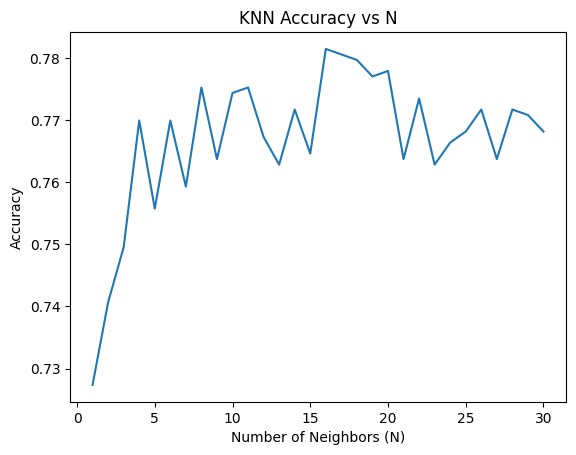

In [42]:
plt.figure()
plt.plot(neighbors_range, acc_list)
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs N')
plt.show()

In [43]:
best_k = neighbors_range[acc_list.index(max(acc_list))]
best_k


np.int64(16)

In [44]:
knn_final = KNeighborsClassifier(
    n_neighbors=best_k,
    metric='minkowski',
    p=2

)

knn_final.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=np.int64(16))

In [45]:
y_pred_knn = knn_final.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print('Accuracy:',acc_knn)
print('Precision:',prec_knn)
print('Recall:',rec_knn)
print('F1 Score:',f1_knn)


Accuracy: 0.7815275310834814
Precision: 0.678391959798995
Recall: 0.42586750788643535
F1 Score: 0.5232558139534884


In [46]:
print(confusion_matrix(y_test, y_pred_knn))

[[745  64]
 [182 135]]


Manhattan

In [47]:
acc_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
  #initializing the classifier for iteration
  classifier_mn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=1)
  #training the ML model
  classifier_mn.fit(X_train, y_train)
  #predict using the trained ML model
  y_pred_mn = classifier_mn.predict(X_test)
  #Evaluate the ML model
  acc = accuracy_score(y_test,y_pred_mn)
  #populate acc_list with accuracy achieved for each value of 'k'
  acc_list.append(acc)


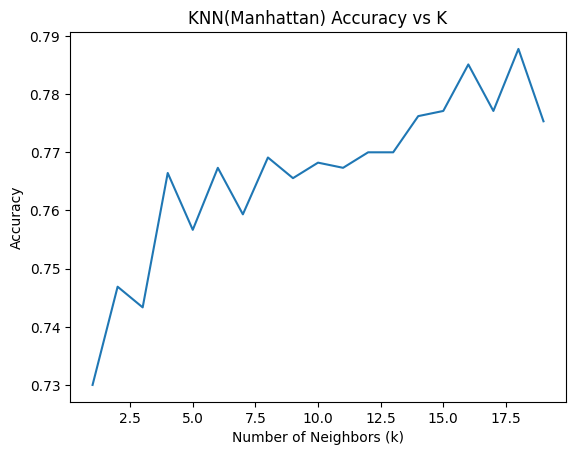

In [48]:
plt.figure()
plt.plot(neighbors_range, acc_list)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN(Manhattan) Accuracy vs K")
plt.show()


In [49]:
best_k_mn = neighbors_range[acc_list.index(max(acc_list))]
best_k_mn, max(acc_list)


(np.int64(18), 0.7877442273534636)

In [50]:
knn_mn_final = KNeighborsClassifier(
    n_neighbors=best_k_mn,
    metric='minkowski',
    p=1
)

knn_mn_final.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=np.int64(18), p=1)

In [51]:
y_pred_knn_mn = knn_mn_final.predict(X_test)

acc_knn_mn = accuracy_score(y_test, y_pred_knn_mn)
prec_knn_mn = precision_score(y_test, y_pred_knn_mn)
rec_knn_mn = recall_score(y_test, y_pred_knn_mn)
f1_knn_mn = f1_score(y_test, y_pred_knn_mn)

print("Accuracy :", acc_knn_mn)
print("Precision:", prec_knn_mn)
print("Recall   :", rec_knn_mn)
print("F1 Score :", f1_knn_mn)

print(confusion_matrix(y_test, y_pred_knn_mn))

Accuracy : 0.7877442273534636
Precision: 0.6805555555555556
Recall   : 0.4637223974763407
F1 Score : 0.551594746716698
[[740  69]
 [170 147]]


## Naive Baye's

In [52]:
#initializing the model
nb= GaussianNB()

# training the model
nb.fit(X_train, y_train)

# prediction
y_pred_nb = nb.predict(X_test)

# evaluation
Acc_nb  = accuracy_score(y_test, y_pred_nb)
Prec_nb = precision_score(y_test, y_pred_nb)
Rec_nb  = recall_score(y_test, y_pred_nb)
f1_nb   = f1_score(y_test, y_pred_nb)

In [53]:
print('The accuracy of nb model is:',Acc_nb)
print('The precision of nb model is:',Prec_nb)
print('The recall of nb model is:',Rec_nb)
print('The f1_score of nb model is:',f1_nb)
confusion_matrix(y_test,y_pred_nb)


The accuracy of nb model is: 0.6793960923623446
The precision of nb model is: 0.46258503401360546
The recall of nb model is: 0.8580441640378549
The f1_score of nb model is: 0.6011049723756906


array([[493, 316],
       [ 45, 272]])

##Decision Tree

In [54]:
#initializing the model
dtree = DecisionTreeClassifier()

#initializing the model

# training the model
dtree.fit(X_train, y_train)

# prediction
y_pred_dtree = dtree.predict(X_test)

# evaluation
Acc_dtree  = accuracy_score(y_test, y_pred_dtree)
Prec_dtree = precision_score(y_test, y_pred_dtree)
Rec_dtree  = recall_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)

In [55]:
print('The accuracy of dtree model is:',Acc_dtree)
print('The precision of dtree model is:',Prec_dtree)
print('The recall of dtree model is:',Rec_dtree)
print('The f1_score of dtree model is:',f1_dtree)
confusion_matrix(y_test,y_pred_dtree)

The accuracy of dtree model is: 0.7291296625222025
The precision of dtree model is: 0.5194805194805194
The recall of dtree model is: 0.5047318611987381
The f1_score of dtree model is: 0.512


array([[661, 148],
       [157, 160]])

#SVM

In [56]:
#initializing the model
svm_balanced = LinearSVC(
    class_weight='balanced',
    max_iter=5000
)

svm_balanced.fit(X_train, y_train)

y_pred_svm = svm_balanced.predict(X_test)

In [57]:
Acc_svm = accuracy_score(y_test, y_pred_svm)
Prec_svm = precision_score(y_test, y_pred_svm)
Rec_svm  = recall_score(y_test, y_pred_svm)
f1_svm   = f1_score(y_test, y_pred_svm)

print("Accuracy :", Acc_svm)
print("Precision:", Prec_svm)
print("Recall   :", Rec_svm)
print("F1 Score :", f1_svm)

confusion_matrix(y_test, y_pred_svm)

Accuracy : 0.7539964476021315
Precision: 0.5414937759336099
Recall   : 0.8233438485804416
F1 Score : 0.6533166458072591


array([[588, 221],
       [ 56, 261]])

#Model Fine-Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# initialize LR model
log_reg_tuned= LogisticRegression(max_iter=1000)

# define hyper parameter search space
param_grid= {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(log_reg_tuned, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_


In [60]:
y_pred_lr = best_log_reg.predict(X_test)
y_prob_lr = best_log_reg.predict_proba(X_test)[:, 1]

# Display best hyperparameters and performance metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8046181172291297
ROC-AUC Score: 0.8494460973355742


### **Observations After Tuning**

Hyperparameter tuning resulted in:

>Improved ROC-AUC for Logistic Regression

>Better Recall and F1-score, indicating improved detection of churn customers

>Accuracy showed marginal change, which is expected in imbalanced datasets

>Class weighting significantly improved model sensitivity to churn cases

The tuned Logistic Regression provided the best balance between performance, interpretability, and robustness.

#**TESTING**

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
test_df=pd.read_csv('/content/drive/MyDrive/DSA_Sreehari/pre-processing/Testing_data.csv')


In [63]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [64]:
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')


##Data preprocssing

###DUPLICATES

In [65]:
test_df.duplicated().sum()

np.int64(0)

In [66]:
test_df.T.duplicated().sum()

np.int64(0)

###MIssing values

In [67]:
test_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [68]:
test_df = test_df.dropna(subset=['TotalCharges'])

In [69]:
test_df.isna().sum().sum()

np.int64(0)

##Feature Engineering

In [70]:
# customer life time value
test_df['Customer_Lifetime_Value'] = (
    test_df['tenure'] * test_df['MonthlyCharges']
)


In [71]:
# Average charges per month
test_df['Avg_Charges_Per_Month'] = (
    test_df['TotalCharges'] / (test_df['tenure'] + 1)
)

In [72]:
contract_map = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}

# Map contract type to numeric duration
test_df['Contract_Duration'] = test_df['Contract'].map(contract_map)

# Create tenure × contract interaction feature
test_df['Tenure_Contract_Interaction'] = (
    test_df['tenure'] * test_df['Contract_Duration']
)


ENCODING

In [73]:
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    if col in test_df.columns:
        test_df[col] = test_df[col].map(binary_map)



In [74]:
test_df = pd.get_dummies(test_df)


In [80]:
test_df = test_df.reindex(columns=X.columns, fill_value=0)


In [81]:
test_df.isna().sum().sum()


np.int64(0)

SCALING


In [82]:
num_cols1 = ['tenure', 'MonthlyCharges', 'TotalCharges']
test_df[num_cols1] = scaler.transform(test_df[num_cols1])


In [83]:
test_df.isnull().sum().sum()


np.int64(0)

## **FOR TESTING ..LOGISTIC REGRESSION IS USED**

In [84]:
test_predictions = best_log_reg.predict(test_df)
test_probabilities = best_log_reg.predict_proba(test_df)[:, 1]


In [85]:
final_output = pd.DataFrame({
    'Churn_Prediction': test_predictions,
    'Churn_Probability': test_probabilities
})

final_output.head()


,Churn_Prediction,Churn_Probability
0,1,0.867470
1,0,0.311812
2,1,0.851724
3,1,0.883327
4,1,0.533318


In [89]:
test_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Customer_Lifetime_Value', 'Avg_Charges_Per_Month', 'Contract_Duration',
       'Tenure_Contract_Interaction', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [90]:
# Predict with tuned model
y_pred_tuned = best_log_reg.predict(X_test)

# Tuned metrics
tuned_acc = accuracy_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)

print(f"Original Recall: {rec_log_reg:.4f} vs Tuned Recall: {tuned_recall:.4f}")
print(f"Original Accuracy: {Acc_log_reg:.4f} vs Tuned Accuracy: {tuned_acc:.4f}")


Original Recall: 0.5741 vs Tuned Recall: 0.5678
Original Accuracy: 0.8011 vs Tuned Accuracy: 0.8046
